---

데이터 수치가 복잡하지 않아, 전처리 과정은 생략합니다. 

---

# 1. 몇 마리가 부화했고, 부화율은 얼마나 될까요?  

In [83]:
########################## 라이브러리 

# !pip install pandas
# !pip install --upgrade pip
# !pip install numpy
import pandas as pd
import numpy as np

########################## 데이터 불러오기 
data_1 = {
    'hatchery': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'chick': [30, 30, 29, 26, 24, 28, 27],
}
hat = pd.DataFrame(data_1)
########################## 데이터 확인 
hat

,hatchery,chick
0,A,30
1,B,30
2,C,29
3,D,26
4,E,24
5,F,28
6,G,27


In [84]:
########################## 컬럼 추가 : 각 hatchery 부화장 당 달걀의 갯수는 30개임
# 'eggs' 열 추가
hat['eggs'] = [30, 30, 30, 30, 30, 30, 30]

**hatchery** : 부화장 수 <br> 
**eggs** : 처음 준비한 달걀 수 <br>
**chick** : 그 중에서 부화한 병아리의 수 

In [85]:
########################## 톰계치 구하는 함수 
hat.describe()

# 1개의 부화장 당 평균 27.7 마리가 부화했다. 
# 1개의 부화장 당 24마리 ~ 30마리가 부화했다. 

,chick,eggs
count,7.000000,7.0
mean,27.714286,30.0
std,2.214670,0.0
min,24.000000,30.0
25%,26.500000,30.0
50%,28.000000,30.0
75%,29.500000,30.0
max,30.000000,30.0


In [86]:
########################## 부화한 병아리 수 기준으로 정렬 
hat.sort_values(by=['chick'],ascending=True)   # 오름차순 

#hat.sort_values(by=['chick'],ascending=False) # 내림차순 

,hatchery,chick,eggs
4,E,24,30
3,D,26,30
6,G,27,30
5,F,28,30
2,C,29,30
0,A,30,30
1,B,30,30


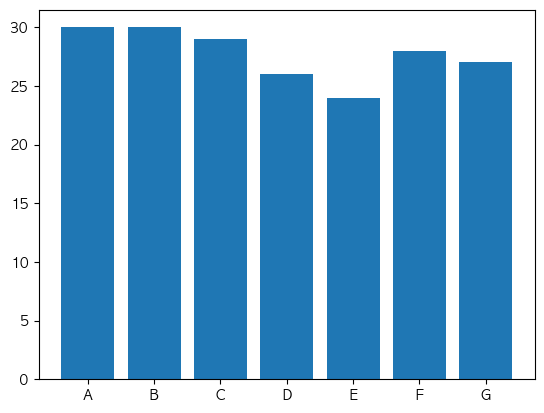

In [87]:
########################## '부화장'별 '부화한 병아리'갯수 그래프화 
#!pip install matplotlib
import matplotlib.pyplot as plt
########################## bar 차트 
plt.bar(hat['hatchery'],hat['chick'])
plt.show()

In [88]:
########################## 그래프 한글폰트 적용 

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 여기서 Matplotlib 코드를 사용하여 그래프 생성 및 표시
%matplotlib inline  

# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='AppleGothic') #맥 
plt.rcParams['axes.unicode_minus'] = False #부호

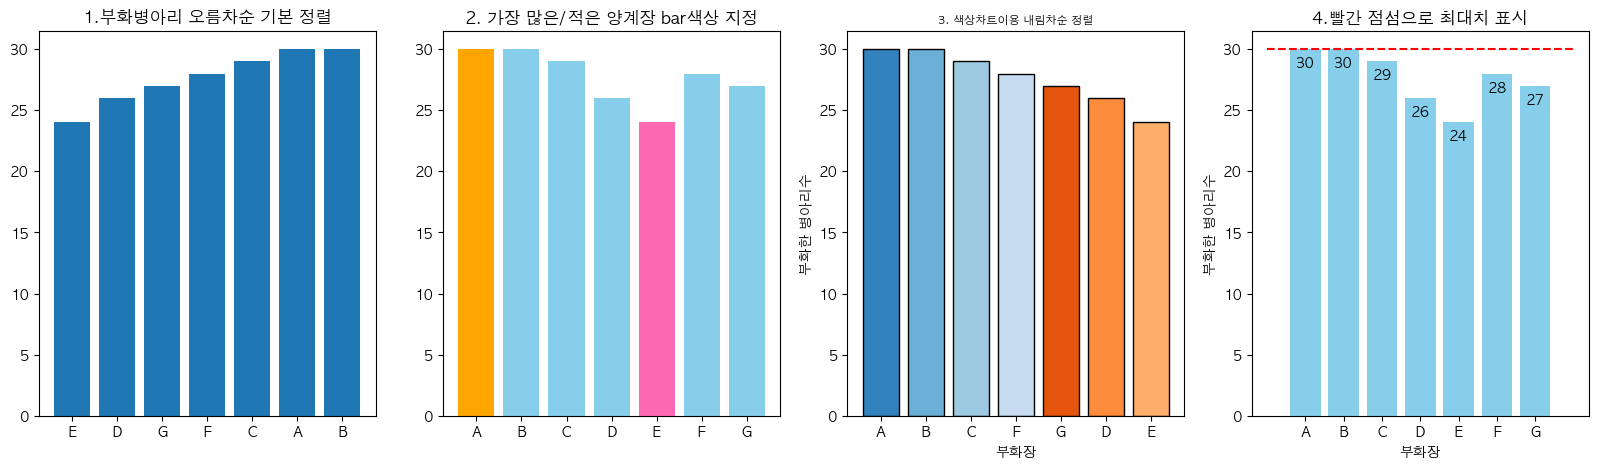

In [89]:
########################## '부화장'별 '부화한 병아리'갯수 그래프 응용 
#!pip install matplotlib
#import matplotlib.pyplot as plt

########################## 1행 4열 그래프 준비 
plt.figure(figsize=(20,5))

###  1  ####################### '부화한 병아리'수로 오름차순 정렬 
hat_sorted = hat.sort_values(by='chick',ascending=True)

plt.subplot(1,4,1) 
plt.bar(hat_sorted['hatchery'],hat_sorted['chick'])
plt.title('1.부화병아리 오름차순 기본 정렬')

###  2  ####################### 가장 적은 부화한 병아리 수가 있는 E 양계장 bar 색상만 변경 
#colors = ['skyblue' if hatch != 'E' else 'orange' for hatch in hat['hatchery']]
colors = ['orange' if h == 'A' else 'hotpink' if h == 'E' else 'skyblue' for h in hat['hatchery']]

plt.subplot(1,4,2)
plt.bar(hat['hatchery'], hat['chick'], color=colors)
plt.title('2. 가장 많은/적은 양계장 bar색상 지정')

###  3  ####################### '부화한 병아리'수로 내림차순 정렬 
hat_sorted_false = hat.sort_values(by='chick',ascending=False)

########### seaborn팔레트 색상 지정 
#!pip install seaborn
import seaborn as sns
col7 = sns.color_palette('tab20c',7)
###########
plt.subplot(1,4,3)
plt.bar(hat_sorted_false['hatchery'],hat_sorted_false['chick'], color = col7 , edgecolor = 'black')
plt.title('3. 색상차트이용 내림차순 정렬', fontsize = 8)
plt.xlabel('부화장')
plt.ylabel('부화한 병아리수')

###  4  ####################### 각bar수치값 기재 + 최대값 점선 추가

def addtext(x,y): 
    for i in range(len(x)):   # x(컬럼)에 있는 값 하나하나
        plt.text(              # 차트위에 표시할거에요. 
            i,
            y[i] - 1.5,        # x값 하나하나 (i) y수치값 적을 위치 
            y[i], 
            ha = 'center'
        )

plt.subplot(1,4,4)
plt.bar(hat['hatchery'], hat['chick'], color='skyblue')
plt.hlines(30,-1,7,colors = 'red',linestyles = 'dashed')    # 최대치 점선 표시 
addtext(hat['hatchery'],hat['chick'])                       # 각 수치값 기재 
plt.title('4.빨간 점섬으로 최대치 표시')
plt.xlabel('부화장')
plt.ylabel('부화한 병아리수')

plt.show()

########################## 4개 모두 동일 내용이지만, 더 나은 그래프 형태를 파악하기 위해 4개로 제작함 

In [90]:
########################## 총 부화한 마리갯수 파악 
hatchery_sum = hat['hatchery'].count()   # 양계장 갯수 
eggs_sum = hat['eggs'].sum()             # 알의 갯수 
chick_sum = hat['chick'].sum()           # 그 중 부화한 병아리 마리 수
not_chick = eggs_sum - chick_sum
print(f'{hatchery_sum} 개의 양계장에서 각 {eggs_sum / hatchery_sum}개씩, 총 {eggs_sum} 개의 알들이 있었습니다.')

########################## 부화율 파악 
# (부화한 병아리 마리수 / 총 알의 갯수) * 100 
hatch_rate = ( chick_sum/eggs_sum ) * 100
print(f'현재까지 총{chick_sum}마리 병아리가 부화하였고, 아직 부화하지 않은 {not_chick}의 알이 있어, 부화율은 {hatch_rate:.1f}%입니다.')

########################## 컬럼 추가 : 각 양계장 별 부화율을 나타냄 
hat['hatch_rate'] = (hat['chick'] / hat['eggs']) * 100 
hat['hatch_rate'] = hat['hatch_rate'].round(1)            # 소수점 1자리까지만 
#hat['hatch_rate'] = hat['hatch_rate'].astype(int)        # 소수점 없이 

########################## 최대,최소 마리가 부화한 양계장과 부화한 마리수 
max_chick_hats = hat[hat['chick'] == 30]['hatchery'].values 
max_chick = hat['chick'].max()      # 의 부화한 마리수 

# min_hat = hat['hatchery'].min()     # 가장 적게 부화한 양계장 E인데 A로 나옴 
min_chick_hat = hat[hat['chick'] == hat['chick'].min()]['hatchery'].values
min_chick = hat['chick'].min()      # 의 부화한 마리수

print(f'가장 많이 부화한 양계장은 {max_chick_hats}이고, {max_chick}마리가 부화했습니다.')
print(f'가장 적게 부화한 양계장은 {min_chick_hat}이고, {min_chick}마리가 부화했습니다.')
print(f'두 양계장의 차이는 {max_chick - min_chick}마리 입니다.')

7 개의 양계장에서 각 30.0개씩, 총 210 개의 알들이 있었습니다.
현재까지 총194마리 병아리가 부화하였고, 아직 부화하지 않은 16의 알이 있어, 부화율은 92.4%입니다.
가장 많이 부화한 양계장은 ['A' 'B']이고, 30마리가 부화했습니다.
가장 적게 부화한 양계장은 ['E']이고, 24마리가 부화했습니다.
두 양계장의 차이는 6마리 입니다.


# 결과 
```
7 개의 양계장에서 각 30.0개씩, 총 210 개의 알들이 있었습니다.
현재까지 총194마리 병아리가 부화하였고, 아직 부화하지 않은 16의 알이 있어, 부화율은 92.4%입니다.
가장 많이 부화한 양계장은 ['A' 'B']이고, 30마리가 부화했습니다.
가장 적게 부화한 양계장은 ['E']이고, 24마리가 부화했습니다.
두 양계장의 차이는 6마리 입니다.
```

---

# 2. 부화한 병아리들의 몸무게는 얼마일까요? 

In [91]:
########################## 데이터 불러오기 
b_chicks = pd.read_csv('./data/ch4-2.csv')
########################## B부화장에서 부화한 30마리 병아리의 번호와 몸무게 
b_chicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   chick_nm  30 non-null     object
 1   weight    30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [92]:
b_chicks.head()

,chick_nm,weight
0,b01,37
1,b02,39
2,b03,41
3,b04,45
4,b05,37


In [93]:
b_chicks.describe()    # B부화장에서 부화한 30마리의 몸무게 (통계수치)

,weight
count,30.000000
mean,38.400000
std,3.286335
min,31.000000
25%,36.250000
50%,39.000000
75%,40.750000
max,45.000000


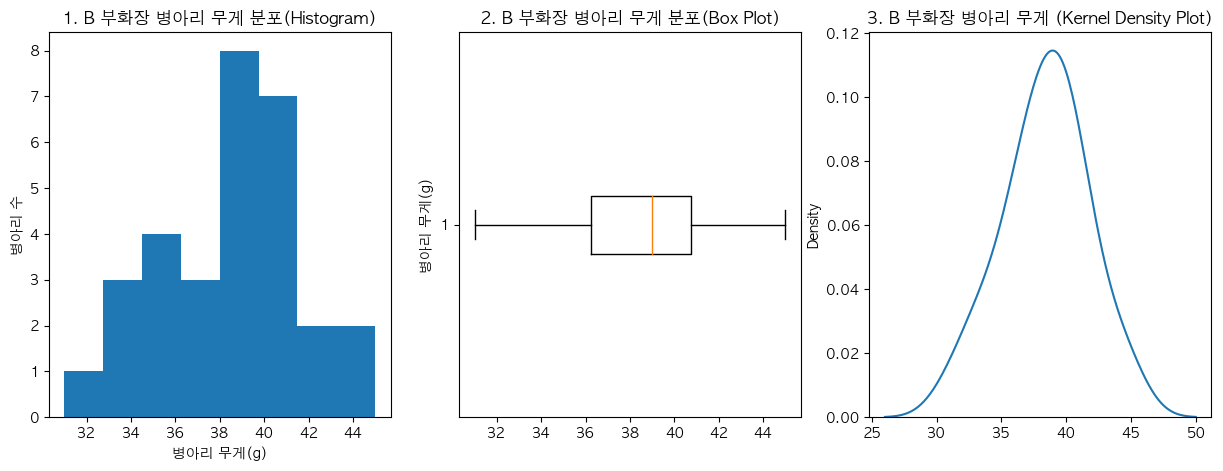

In [94]:
########################## B 부화장 병아리의 무게 분포도 확인 (표준편차 std : 3.286335)

# 평균mean값이 38.4 인데, 서로 너무 많이 차이가 나면 병아리 사육하는데 어려울 수 있으니 확인해봅니다. 

plt.figure(figsize=(15,5))
plt.rcParams['font.size'] = 10

########################## 히스토그램으로 분포도 확인 

plt.subplot(1,3,1)
plt.hist(b_chicks.weight, bins=8)
plt.xlabel('병아리 무게(g)')
plt.ylabel('병아리 수')
plt.title('1. B 부화장 병아리 무게 분포(Histogram)')

########################## 상자그림으로 분포도 확인 

plt.subplot(1,3,2)
plt.boxplot(b_chicks.weight, vert = False)     # vert 박스플롯 모양 가로 (없으면 세로)
plt.title('2. B 부화장 병아리 무게 분포(Box Plot)')
plt.ylabel('병아리 무게(g)')

########################## 커널밀도그림으로 분포도 확인

plt.subplot(1,3,3)
sns.kdeplot(b_chicks.weight.values)
plt.title('3. B 부화장 병아리 무게 (Kernel Density Plot)')

plt.show()

In [95]:
########################## 통계치 변수화  
weight = b_chicks['weight'].describe()

weight_max = weight['max']
weight_min = weight['min']
weight_mean = weight['mean']      
weight_25 = weight['25%']         # Q1 
weight_median = weight['50%']
weight_75 = weight['75%']         # Q3 
weight_std = weight['std']

print(f'병아리 몸무게 최대값 {int(weight_max)}g ~ 최소값 {int(weight_min)}g 입니다.')
print(f'병아리 몸무게 평균값 {weight_mean}g이고, 중앙값은 {weight_median}g입니다.')

########################## IQR 값 구하기 

Q1 = weight_25  # weight['25%']    # b_chicks['weight'].quantile(0.25)
Q3 = weight_75  # weight['75%']    # b_chicks['weight'].quantile(0.75)
IQR = Q3 - Q1

########################## IQR값으로 max값 구하기 (잠재적인 이상치를 식별) 
# Q3 + ( IQR * 1.5 ) 

IQR_max = Q3 + (IQR * 1.5)
IQR_min = Q1 - (IQR * 1.5)

print(f'잠재적 이상치를 식별할수 있는 기준값으로는, {IQR_max}g 이상값이거나 {IQR_min}g 미만값입니다.')
print(f'현재까지는 이상치로 보여지는 값들은 없으며, 정규분포에 가까운 형태로 보여집니다.')

병아리 몸무게 최대값 45g ~ 최소값 31g 입니다.
병아리 몸무게 평균값 38.4g이고, 중앙값은 39.0g입니다.
잠재적 이상치를 식별할수 있는 기준값으로는, 47.5g 이상값이거나 29.5g 미만값입니다.
현재까지는 이상치로 보여지는 값들은 없으며, 정규분포에 가까운 형태로 보여집니다.


# 결과 
```
병아리 몸무게 최대값 45g ~ 최소값 31g 입니다.
병아리 몸무게 평균값 38.4g이고, 중앙값은 39.0g입니다.
잠재적 이상치를 식별할수 있는 기준값으로는, 47.5g 이상값이거나 29.5g 미만값입니다.
현재까지는 이상치로 보여지는 값들은 없으며, 정규분포에 가까운 형태로 보여집니다.
```

# 3. 사료 제조사별 성능 차이가 있을까요? 

In [96]:
########################## 데이터 불러오기 
test = pd.read_csv('./data/ch4-3.csv')
########################## 부화된지 5일 지난, 각 부화장에서의 병아리들의 몸무게 데이터 비교 
test

,hatchery,chick_nm,weight
0,A,a01,112
1,A,a05,116
2,A,a09,106
3,A,a12,104
4,A,a15,116
5,A,a17,118
6,A,a26,110
7,A,a28,112
8,A,a29,106
9,A,a30,108


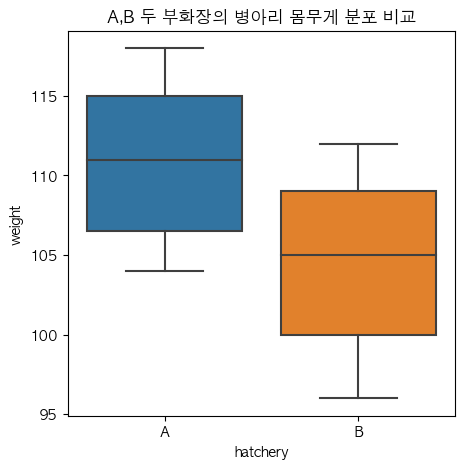

In [97]:
########################## 두 집단 분포 비교를 위해 boxplot 시각화 

plt.figure(figsize=(5,5))

########## plt.boxplot(data = test , x ='hatchery',y='weight')    이 방식의 boxplot은 sns이다. 

sns.boxplot(data = test ,  x='hatchery',y='weight')

plt.title('A,B 두 부화장의 병아리 몸무게 분포 비교')
plt.show()

A 부화장 병아리들 몸무게가 좀 더 높게 분포하고 있으므로, 두 부화장의 몸무게 평균이 다르다는 것이 확인되었습니다. 

### 다른 방식인, 가설검증을 통해 두 부화장 병아리들의 몸무게 평균이 같은지 다른지 알아보겠습니다. 

<br>

**순서1** 정규분포를 따르는지 p-value값 확인
- 귀무가설 H0 : 두 부화장의 병아리들의 몸무게 평균은 유사하다.
- 대립가설 H1 : 두 부화장의 병아리들의 몸무게 평균은 다르다.

**순서2** 두 부화장의 병아리 몸무게 평균이 같은지 다른지 검정 

In [98]:
########################## 가설검증
import scipy as sp
########################## 부화장 A와 B의 각각 몸무게 데이터셋 
test_a = test.loc[test.hatchery == 'A', 'weight']
test_b = test.loc[test.hatchery == 'B', 'weight']

In [99]:
########################## 샤피로-윌크 검정 (정규분포 따르는지 확인) 
sp.stats.shapiro(test_a)

ShapiroResult(statistic=0.9400018453598022, pvalue=0.5530334711074829)

In [100]:
########################## 샤피로-윌크 검정 (정규분포 따르는지 확인) 
sp.stats.shapiro(test_b)

ShapiroResult(statistic=0.9390683770179749, pvalue=0.5426943302154541)

귀무가설 : 두 부화장의 병아리들의 몸무게 평균은 유사하다 <br>
p-value값 : 0.5530<br>
대립가설 : 두 부화장의 병아리들의 몸무게 평균은 다르다 <br>
p-value값 : 0.5427<br><br>
둘 다 신뢰수준을 95% 로 설정할 때의 유의수준인 0.05보다 크기 때문에,**귀무가설을 채택**합니다. <br>
test_a와 test_b 데이터 셋 모두 **정규분포** 합니다. 

---

**여기서 잠깐!**

- 신뢰수준(1-a) : 통계에서 어떤 값이 알맞은 추정값이라고 믿을 수 있는 정도를 뜻한다. 주로 95%를 사용하며 신뢰도라고도 부른다.
- 유의수준(a) : 통계적인 가설검정에서 사용되는 기준값
- 유의확률(p-value) : 귀무가설이 맞다고 가정할 때 얻은 결과보다, 극단적인 결과가 실제로 관측될 확률을 말한다.<br>
p값이 유의수준보다 작으면 귀무가설을 기각하고 대립가설을 채택하며, 반대일 경우에는 귀무가설을 채택합니다.
---

In [101]:
########################## 부화장 A,B의 각 평균 검정 
sp.stats.ttest_ind(test_a, test_b)

TtestResult(statistic=2.842528280230058, pvalue=0.010803990633924202, df=18.0)

# 결과 
#### 1. 정규분포 여부 확인
```
귀무가설 : 두 부화장의 병아리들의 몸무게 평균은 유사하다 <br>
p-value값 : 0.5530<br>
대립가설 : 두 부화장의 병아리들의 몸무게 평균은 다르다 <br>
p-value값 : 0.5427<br><br>
둘 다 신뢰수준을 95% 로 설정할 때의 유의수준인 0.05보다 크기 때문에,**귀무가설을 채택**합니다. <br>
test_a와 test_b 데이터 셋 모두 **정규분포** 합니다. 
```
#### 2. 평균이 A,B 같은지 다른지 검정하기
```
귀무가설 : 두 부화장의 병아리들의 몸무게 평균은 유사하다. <br>
p-value값 : 0.0108 

p-value값이 0.05보다 작기 때문에, 95% 신뢰수준에서 **대립가설을 채택**합니다. <br>
대립가설 : **두 부화장의 병아리들의 몸무게 평균은 다르다**
```
[참고]<br>
만약 신뢰수준을 99%라고 설정했다면, p-value가 0.01보다 크기 때문에 귀무가설을 채택합니다.

# 4. 병아리 성장에 영향을 미치는 요소는 무엇일까요? 

In [102]:
########################## 데이터 불러오기 
w = pd.read_csv('./data/ch5-1.csv')
########################## 부화한지 1주일된 병아리의 데이터
w.head()

,chick_nm,weight,egg_weight,movement,food
0,a01,140,65,146,14
1,a02,128,62,153,12
2,a03,140,65,118,13
3,a04,135,65,157,13
4,a05,145,69,157,13


- weight : 병아리 몸무게
- egg_weight : 종란 몸무게
- movement : 하루 평균 이동거리
- food : 하루 평균 사료 섭취량 

In [103]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chick_nm    30 non-null     object
 1   weight      30 non-null     int64 
 2   egg_weight  30 non-null     int64 
 3   movement    30 non-null     int64 
 4   food        30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [104]:
########################## 상관분석 위한 별도 데이터셋 방법 1 
w_n = w.iloc[:,1:5]        # 행 rows 선택 , 열 columns 선택 
########################## object열인 chick_nm 열 제외하고 모든 행 
w_n.head()

,weight,egg_weight,movement,food
0,140,65,146,14
1,128,62,153,12
2,140,65,118,13
3,135,65,157,13
4,145,69,157,13


In [105]:
########################## 피어슨 상관분석 실시 
w_pearson = w_n.corr(method = 'pearson') 
w_pearson

,weight,egg_weight,movement,food
weight,1.000000,0.957169,0.380719,0.877574
egg_weight,0.957169,1.000000,0.428246,0.808147
movement,0.380719,0.428246,1.000000,0.319011
food,0.877574,0.808147,0.319011,1.000000


In [106]:
########################## 상관분석 위한 별도 데이터셋 방법 2 
numeric_columns = w.select_dtypes(include=['int64', 'float64'])  # 피어슨 방식 
########################## 숫자열만 추출하여 진행 
corr = numeric_columns.corr()
corr

,weight,egg_weight,movement,food
weight,1.000000,0.957169,0.380719,0.877574
egg_weight,0.957169,1.000000,0.428246,0.808147
movement,0.380719,0.428246,1.000000,0.319011
food,0.877574,0.808147,0.319011,1.000000


1.0 에 가까울 수록, 병아리몸무게 weight의 큰 양의 상관계수를 나타내며<br>
-0.0 에 가까울 수록, 병아리몸무게 weight의 큰 음의 상관계수를 나타낸다.<br>

0.0에 가까울 수록 약한 상관관계를 가지고 있기 때문에 무시한다. 

[참고] 상관계수를 구하는 방식에는 Pearson, Spearman, Kendall 3가지 방법이 존재한다.

In [107]:
########################## 스피어만 상관계수 (학습용) 
w_spearman = w_n.corr(method = 'spearman') 
w_spearman

,weight,egg_weight,movement,food
weight,1.000000,0.962815,0.372809,0.899095
egg_weight,0.962815,1.000000,0.442330,0.828661
movement,0.372809,0.442330,1.000000,0.353778
food,0.899095,0.828661,0.353778,1.000000


In [108]:
########################## 켄달 상관계수 (학습용) 
w_kendall = w_n.corr(method='kendall')
w_kendall

,weight,egg_weight,movement,food
weight,1.000000,0.891004,0.276622,0.796195
egg_weight,0.891004,1.000000,0.315861,0.712230
movement,0.276622,0.315861,1.000000,0.266338
food,0.796195,0.712230,0.266338,1.000000


'pearson' 방식: Pearson 상관 계수를 사용하여 열 간의 **선형 상관 관계**를 계산합니다.<br>
'spearman' 방식: Spearman 순위 상관 계수를 사용하여 열 간의 **비선형 관계 및 순위 기반 상관 관계**를 계산합니다.<br>
'kendall' 방식: Kendall 순위 상관 계수를 사용하여 열 간의 **비선형 관계 및 순위 기반 상관 관계**를 계산합니다.<br>

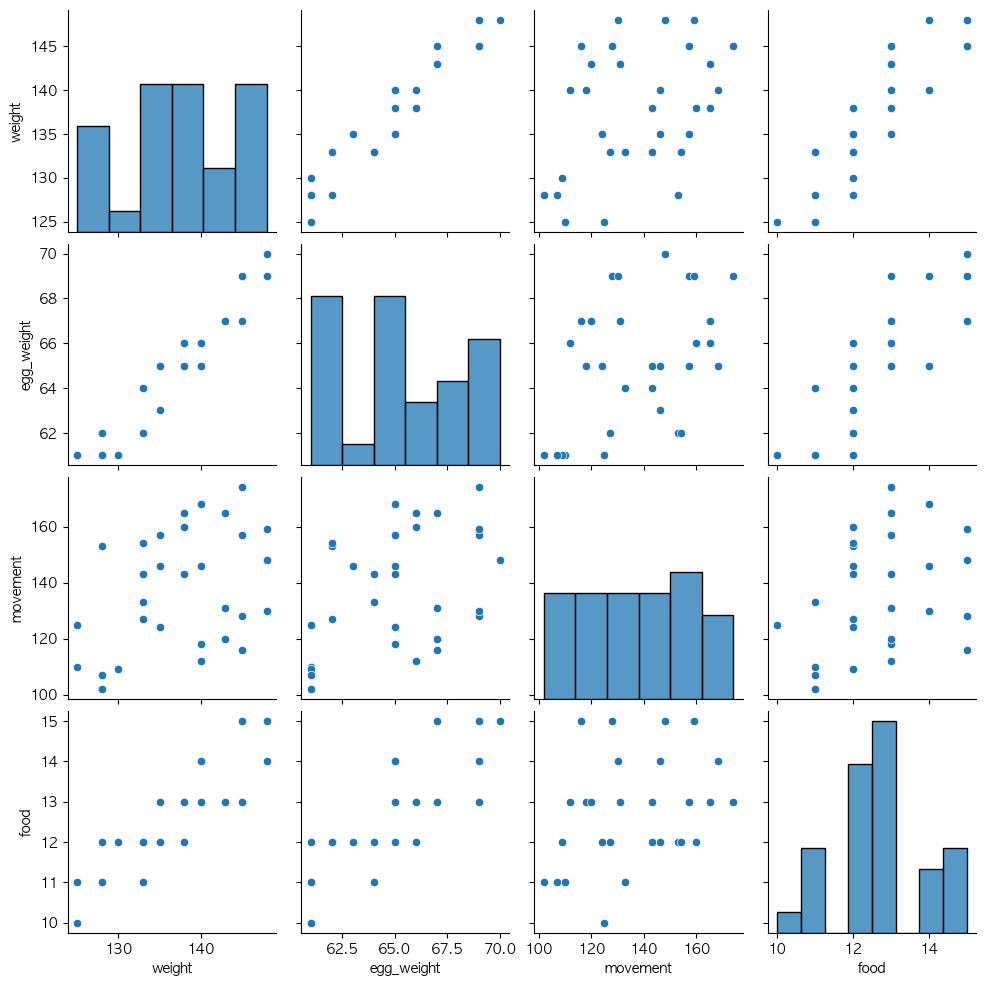

In [109]:
########################## 상관관계 시각화 
import matplotlib.pyplot as plt
import seaborn as sns
##########################
sns.pairplot(w_n)               # 상관분석하기 전, 수치값만 있는 데이터 

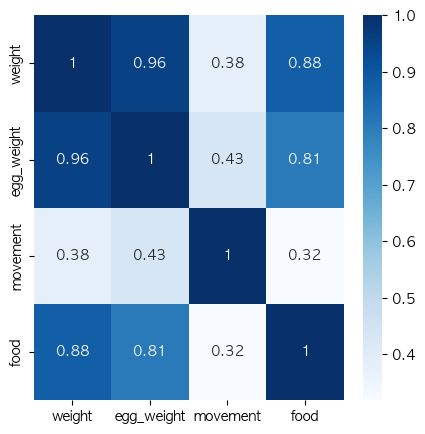

In [110]:
########################## 상관관계 히트맵 시각화 
plt.figure(figsize=(5,5))
sns.heatmap(w_pearson, annot = True, cmap='Blues')        # 피어슨 상관계수 진행한 데이터 
plt.show()

# 결과 

**강한 양의 상관관계**
```
weight : egg_weight, food
egg_wiehgt : weight, food
food : weight , egg_weight
```
**강한 음의 상관관계**
```
weight : movement
egg_weight : movement
movement : weight, egg_weight, food
food : movement
```

# 5. 병아리의 몸무게를 예측할수 있을까요? 

회귀분석이란, <br>
연속형 변수들에 대해 두 변수(x,y)간의 관계를 수식으로 나타내는 분석 방법입니다. <br>
x라는 독립변수와 y라는 종속변수가 존재할 때, 이 두 변수간 관계를 y=ax+b와 같은 형태 수식으로 나타낼 수 있는 방법입니다.

가로축이 x, 세로축이 y인 산점도가 있을 때, 가장 적합한 하나의 직선을 표현하는 방식이 회귀분석입니다. <br>
직선과 개별 값들 간의 오차를 최소화하는 직선을 찾는것을 목표로 합니다. <br>

#### 1. 단순선형 회귀분석 : 종속변수(y)와 독립변수(x)가 각각 하나씩 존재하며 서로 선형적인 관계를 가질 때
#### 2. 다중 회귀분석 : 종속변수(y)와 독립변수가 2개이상를 가질 때
하나씩 제거하는 후진소거법으로 진행 <br>
독립변수(x)들의 높은 상관관계로 문제가 있는지, 다중공선성 확인 필요 
#### 3. 비선형 회귀분석 : 종속변수(y)와 독립변수(x)가 선형관계가 아닌 비선형관계를 가질 때 

In [111]:
#################################################### 단순선형 회귀분석

# 종속변수 y(1개)와 독립변수 x(1개) 의 관계성 수식화 
# 제일 강한 양의 상관관계 : weight 과 egg_weight 
# 여기서 y 를 weight으로, x 를 egg_weight 으로 두고 진행하겠습니다. 

########################## 회귀분석 수행 위한 모듈 불러오기 --> smf 약어로 지칭 

import statsmodels.formula.api as smf 

########################## y와 x의 단순 선형 회귀모델 구축 ( y ~ x  )

model_lm = smf.ols(formula = 'weight ~ egg_weight', data = w_n )

########################## 모델 학습 

result_lm = model_lm.fit()

########################## 모델 결과 확인 

result_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.32e-16
Time:                        19:59:08   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.106     -32.380       3.285
egg_weight     2.3371      0.134     17.493      0.000       2.063       2.611
==============================================================================
Omnibus:                       15.078   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.750
Skew:                           0.032   Prob(JB):                        0.253
Kurtosis:                       1.518   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 회귀분석에서 p값의 의미란, 
```
위의 가설검정을 기반으로 회귀모델과 개별 독립변수(x)가 통계적으로 유의한지 판단하는 것이다.

귀무가설 : 회귀모델이나 개별 독립변수(x)가 '종속변수(y)의 변화에 영향을 미치지 않는다'
대립가설 : 회귀모델이나 개별 독립변수(x)가 '종속변수(y)의 변화에 영향을 미친다'
```
유의수준은 정하기 나름이나, 일반적으로 0.05를 기준으로 사용하기 때문에 <br>
p값(p-value유의확률)이 **0.05보다 크면, 귀무가설**을 채택합니다. <br>
p값(p-value유의확률)이 **0.05보다 작으면, 대립가설**을 채택합니다. <br>

![](https://velog.velcdn.com/images/beckhye/post/b5a81290-abde-4408-a829-3e710eecdccf/image.png)

In [112]:
print(result_lm.summary())          # 동일내용이나, 보고서 형태로 출력 

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.32e-16
Time:                        19:59:08   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.1

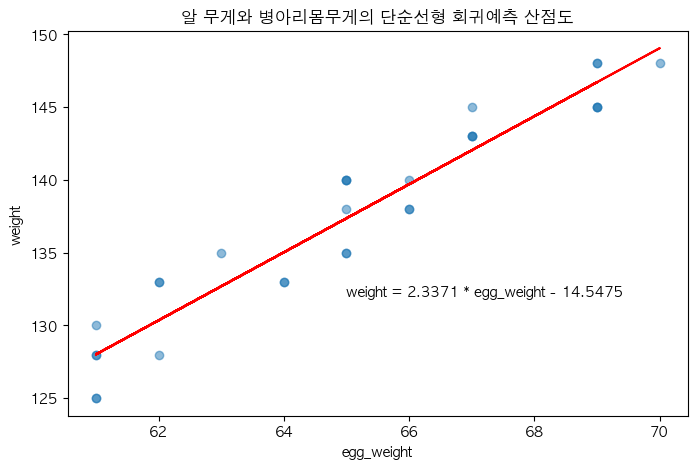

In [113]:
#################################################### 단순선형 회귀분석 "산점도"
# egg_weight(x)에 따른 weight(y) 몸무게 산점도 

# 네모칸 
plt.figure(figsize=(8,5))

# x축에 egg_weight을, y축에 weight을, 그리고 투명도 0.5으로  
plt.scatter(w.egg_weight, w.weight, alpha=.5)

# 단순선형으로 예측된 회귀선 그리기 
plt.plot(w.egg_weight, w.egg_weight*2.3371 - 14.5475, color = 'red')

# 텍스트 내용 작성  (가로 많을수록 오른쪽, 세로 높을수록 위에)
plt.text(65, 132, 'weight = 2.3371 * egg_weight - 14.5475', fontsize= 10)

plt.title('알 무게와 병아리몸무게의 단순선형 회귀예측 산점도')
plt.xlabel('egg_weight')
plt.ylabel('weight')
plt.show()

### 잔차 히스토그램으로 추가적으로 성능판단 하기

잔차(Residual)는 회귀분석에서 중요한 개념으로, 실제 관찰된 종속 변수(또는 반응 변수) 값과 회귀 모델로 예측한 값 사이의 차이를 나타냅니다. <br>
회귀 모델의 적합성을 평가하고 모델의 예측 정확도를 검증하는 데 사용됩니다.<br>

잔차 (e) = 실제 관찰값 - 모델 예측값

잔차는 양수일 수도 있고 음수일 수도 있습니다. <br>
양수인 경우는 모델이 관측값보다 낮게 예측한 경우를 나타내며, 음수인 경우는 모델이 관측값보다 높게 예측한 경우를 나타냅니다.

잔차의 정규성, 독립성, 등분산성 등을 평가하여 모델의 적합성을 판단합니다. <br>
이를 통해 모델의 예측 정확도와 신뢰성을 평가하고, 필요에 따라 모델을 개선할 수 있습니다.

쉽게말해서,"잔차"는 회귀 분석 모델로 예측한 값과 실제 관측된 값 간의 차이를 나타냅니다. <br>
잔차는 예측 모델의 정확도를 평가하고 모델이 데이터를 얼마나 잘 설명하는지를 판단하는 데 사용됩니다.

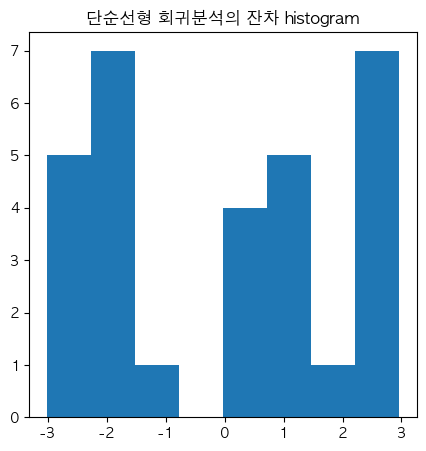

In [114]:
#################################################### 단순선형 회귀분석 "잔차 히스토그램" 
plt.figure(figsize=(5,5))
plt.hist(result_lm.resid, bins = 8)
plt.title('단순선형 회귀분석의 잔차 histogram')
plt.show()                                    

이상적인 모양은 0 근처에 주로 분포가 많은 세로가 긴 종 모양 <br>
그러나, 지금과 같은 경우 잔차가 다양하에 분포된 형태로 나왔다. <br>
잔차를 줄이기 위해서, 독립변수(x)를 더 늘려 다중 회귀분석을 진행해 보겠습니다. 

In [115]:
#################################################### 다중 회귀분석

# 종속변수 y(1개)와 독립변수 x(2개이상)의 관계성 수식화 
# 단순회귀시 weight(y) , egg_weight(x) 였는데 food(x) 와 movement(x) 를 추가하겠습니다. 

########################## 회귀분석 수행 위한 모듈 불러오기 --> smf 약어로 지칭 

# import statsmodels.formula.api as smf 

########################## y 와 x변수들간의 다중 회귀모델 구축 ( y ~ x + x + x .. )

model_mlm = smf.ols(formula = 'weight ~ egg_weight + food + movement', data = w_n )

########################## 모델 학습 

result_mlm = model_mlm.fit()

########################## 모델 결과 확인 

result_mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     157.7
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           8.46e-17
Time:                        19:59:08   Log-Likelihood:                -56.008
No. Observations:                  30   AIC:                             120.0
Df Residuals:                      26   BIC:                             125.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9748      8.587      0.346      0.732     -14.676      20.626
egg_weight     1.7763      0.195      9.117      0.000       1.376       2.177
food           1.5847      0.405      3.915      0.001       0.753       2.417
movement      -0.0087      0.017     -0.522      0.606      -0.043       0.026
==============================================================================
Omnibus:                        1.993   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.746
Skew:                          -0.480   Prob(JB):                        0.418
Kurtosis:                       2.311   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

![](https://velog.velcdn.com/images/beckhye/post/fde2d1e5-5538-4401-bdfe-1a200bd2ea85/image.png)

In [116]:
#################################################### 다중 회귀 분석 (movement 제외) 

# 단순회귀시 weight(y) , egg_weight(x) 였는데 food(x)만 추가하겠습니다. 

########################## 회귀분석 수행 위한 모듈 불러오기 --> smf 약어로 지칭 

# import statsmodels.formula.api as smf 

########################## y 와 x변수들간의 다중 회귀모델 구축 ( y ~ x + x + x .. )

model_mlm2 = smf.ols(formula = 'weight ~ egg_weight + food', data = w_n )

########################## 모델 학습 

result_mlm2 = model_mlm2.fit()

########################## 모델 결과 확인 

result_mlm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     243.0
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           5.44e-18
Time:                        19:59:09   Log-Likelihood:                -56.164
No. Observations:                  30   AIC:                             118.3
Df Residuals:                      27   BIC:                             122.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6638      8.370      0.438      0.665     -13.510      20.837
egg_weight     1.7453      0.183      9.536      0.000       1.370       2.121
food           1.5955      0.399      4.001      0.000       0.777       2.414
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.940
Skew:                          -0.502   Prob(JB):                        0.379
Kurtosis:                       2.263   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

![](https://velog.velcdn.com/images/beckhye/post/51e5e243-dada-4b33-8c67-f1e0d0274705/image.png)

### 다중공선성 

독립변수x가 많은 다중 회귀분석의 경우, 독립변수들끼리 서로 강한 상관관계로 인해 제대로 된 회귀분석이 안 될 수 있습니다. <br>
이런 현상을 다중공선성 문제라고 합니다. <br><br>
분산팽창요인 (VIF , Variance Inflation Factor) 를 계산하여 문제가 있는지 확인할수 있습니다. <br>
```
statsmodels.stats.outliers_influence모듈 
```
일반적으로 10이상이면 다중공선성 문제가 있다고 판단, 30초과이면 심각한 문제가 있다고 판단합니다. <br>

In [117]:
#################################################### 다중 회귀분석의 다중공선성 확인 

from statsmodels.stats.outliers_influence import variance_inflation_factor

########################## 회귀모델 변수명 속성 확인 

model_mlm2.exog_names

['Intercept', 'egg_weight', 'food']

In [118]:
########################## 첫번째 변수 (egg_weight) 의 vif 계산 

vif1 = variance_inflation_factor(model_mlm2.exog, 1 )

########################## 두번째 변수 (food ) 의 vif 계산

vif2 = variance_inflation_factor(model_mlm2.exog, 2 )

########################## 첫번째, 두번째 변수의 vif 출력 
print(vif1)
print(vif2)

2.8826845113075716
2.8826845113075765


```
두개의 독립변수 x (egg_weight과 food) 모두 분산팽창요인 계산결과 2.88 이 나왔다.
10 이하이기 때문에 다중공선성 문제는 없는 것으로 판단됩니다. 
```
다중 회귀분석의 경우 독립변수가 2개이상이기에 최소 3차원 이상의 축을 가진 그래프를 그려야 하는데, <br>
시각적으로 알아보기가 힘들 뿐더러 다소 복잡할 수 있으니 잔차(residual)의 히스토그램만 확인하겠습니다. 

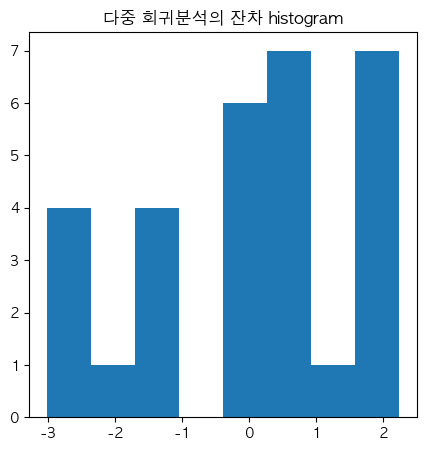

In [119]:
########################## 다중회귀분석의 잔차 histogram
plt.figure(figsize=(5,5))
plt.hist(result_mlm2.resid, bins = 8 )
plt.title('다중 회귀분석의 잔차 histogram')
plt.show()

위의 단순선형 회귀분석의 잔차 histogram 보다는 좀 더 0 기준으로 분포가 모인 종 모양으로 가까워졌다.<br>
이에 최종적으로 병아리 몸무게 (weight)을 알 무게(egg_weight)와 하루 평균 사료 섭취량(food)을 독립변수로 둔 수식이다. <br>
#### weight = ( 1.7453 * egg_weight ) + (1.5955 * food ) + 3.6638 

In [120]:
#################################################### 비선형 회귀분석 하기 전,
w2 = pd.read_csv('./data/ch5-2.csv')
w2                 # 성장기간에 따른 병아리 몸무게 변화 데이터 

,day,weight
0,1,43
1,2,55
2,3,69
3,4,86
4,5,104
...,...,...
65,66,3239
66,67,3247
67,68,3254
68,69,3260


In [121]:
#################################################### 비선형 회귀분석 하기 전,
w2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   day     70 non-null     int64
 1   weight  70 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


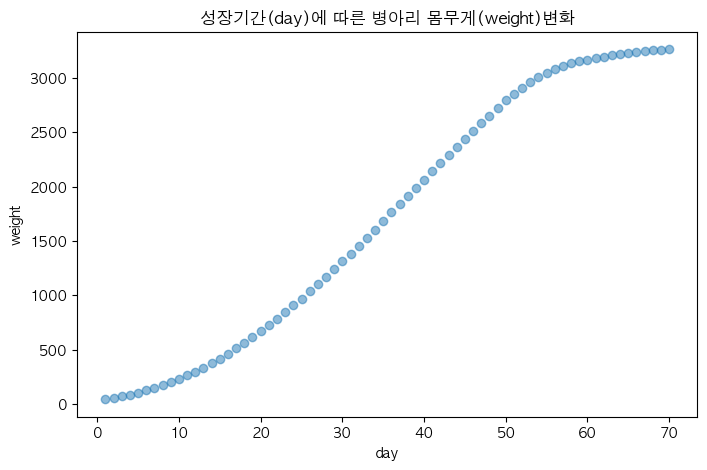

In [122]:
#################################################### 비선형 회귀분석 하기 전, 
# 데이터 형태 확인 = 산점도 = Scatter Plot

plt.figure(figsize = (8,5))
plt.scatter(w2.day, w2.weight, alpha = .5)
plt.title('성장기간(day)에 따른 병아리 몸무게(weight)변화')
plt.xlabel('day')
plt.ylabel('weight')
plt.show()

직선의 형태가 아니지만, 그래도 선형 회귀분석을 실행해보겠습니다. 

In [123]:
#################################################### 비선형 회귀분석 하기 전, 선형 회귀분석 
# 성장기간(day)에 따른 병아리 몸무게(weight)변화 선형 회귀 모델 구축 

model_lm2 = smf.ols(formula = 'weight ~ day', data = w2)

########################## 모델 학습
result_lm2 = model_lm2.fit()

########################## 모델 결과 확인 
result_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3189.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           7.22e-59
Time:                        19:59:10   Log-Likelihood:                -457.86
No. Observations:                  70   AIC:                             919.7
Df Residuals:                      68   BIC:                             924.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -295.8671     41.102     -7.198      0.000    -377.885    -213.850
day           56.8216      1.006     56.470      0.000      54.814      58.830
==============================================================================
Omnibus:                        3.866   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.079
Skew:                          -0.133   Prob(JB):                        0.354
Kurtosis:                       2.199   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 결과 
- R2 : 0.979 이기에 다소 높은 회귀모델이라고 확인.
- P>|t| : 개별 독립변수의 p값도 0.000으로서 0.05보다 낮아, 95% 신뢰수준에서 모두 유의함을 확인.

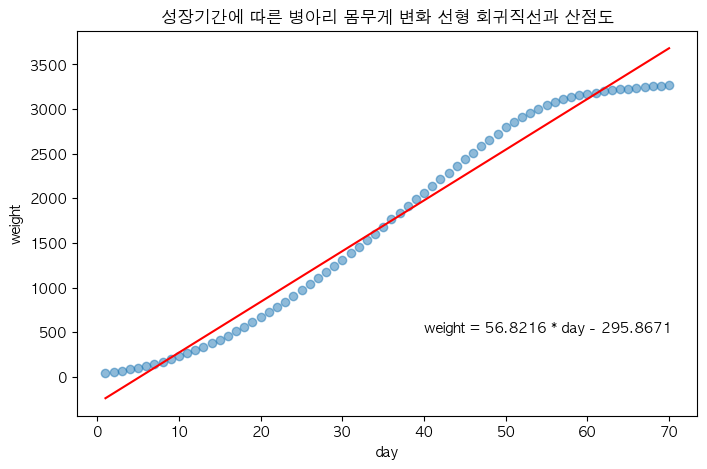

In [124]:
#################################################### 비선형 회귀분석 하기 전, 선형 회귀분석 
# 회귀분석 결과를 이용하여, 산점도에 적합한 회귀직선을 추가 
# 성장기간(day)에 따른 병아리 몸무게(weight)변화 

# 네모칸 
plt.figure(figsize = (8,5))

# x축에 성장기간, y축에 몸무게 , 그리고 산점도 투명도 0.5 
plt.scatter(w2.day, w2.weight, alpha = .5)

# 선형으로 예측된 회귀선 그리기 (day * day의 coef - Intercept의 coef)
plt.plot(w2.day, w2.day*56.8216 - 295.8671, color = 'red')

# y = ( day의 coef * day ) - Intercept의 coef 를 텍스트 
plt.text(40,500,'weight = 56.8216 * day - 295.8671', fontsize = 10)

plt.title('성장기간에 따른 병아리 몸무게 변화 선형 회귀직선과 산점도')
plt.xlabel('day')
plt.ylabel('weight')
plt.show()

산점도와 직선을 같이 표시하고 보니, 편차가 존재하는 구간들로 인해 회귀모델 성능이 다소 아쉽다. <br>

**독립변수x(day)를 세제곱**시켜, 종속변수y(weight)을 잘 표현할 수 있는지 확인하겠습니다.

In [125]:
#################################################### 비선형 회귀분석 

# 성장기간에 따른 병아리 몸무게 변화 비선형회귀 모델 구축 
# 세제곱 하기 위해서는 I 함수 이용 
# 종속 변수(y)는 weight이고, 독립 변수(x)로 day의 세제곱, 제곱, 그리고 일차항을 사용합니다.
model_nlm = smf.ols(formula = 'weight ~ I(day**3) + I(day**2) + day', data = w2)

# 모델 학습 
result_nlm = model_nlm.fit()

# 모델 결과 확인 
result_nlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.407e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          7.13e-109
Time:                        19:59:12   Log-Likelihood:                -327.17
No. Observations:                  70   AIC:                             662.3
Df Residuals:                      66   BIC:                             671.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     117.0141     13.476      8.683      0.000      90.108     143.920
I(day ** 3)    -0.0253      0.000    -51.312      0.000      -0.026      -0.024
I(day ** 2)     2.6241      0.053     49.314      0.000       2.518       2.730
day           -15.2978      1.632     -9.373      0.000     -18.557     -12.039
==============================================================================
Omnibus:                        6.702   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                2.680
Skew:                           0.103   Prob(JB):                        0.262
Kurtosis:                       2.064   Cond. No.                     5.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

![](https://velog.velcdn.com/images/beckhye/post/c964e3b8-80a7-4b4c-963f-5683214b4f2d/image.png)

## 결과 
R2 : 1.0 이다. <br>
산점도를 다시 그리고, 회귀분석 결과를 이용하여 산점도 위 적합한 회귀곡선을 추가하겠다.

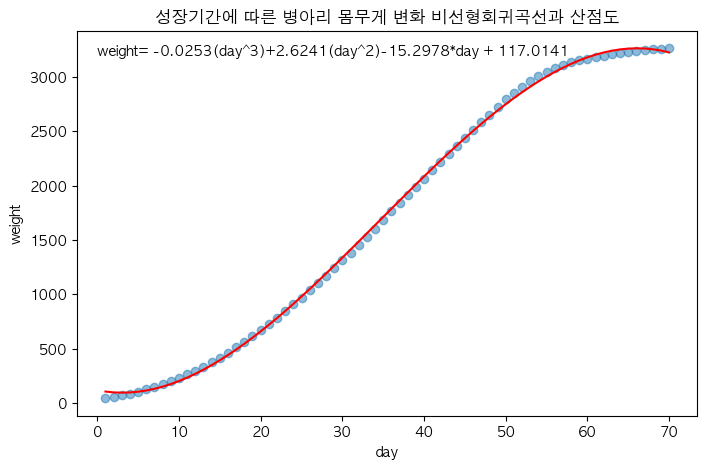

In [126]:
#################################################### 비선형 회귀분석 그래프
# 회귀분석 결과를 이용하여, 산점도에 적합한 회귀곡선을 추가 
# 성장기간(day)에 따른 병아리 몸무게(weight)변화 

# 네모칸 
plt.figure(figsize = (8,5))

# x축에 성장기간, y축에 몸무게 , 그리고 산점도 투명도 0.5 
plt.scatter(w2.day, w2.weight, alpha = .5)

###################### 비선형으로 예측된 회귀선 그리기 
plt.plot(w2.day, (w2.day**3)*(-0.0253)+(w2.day**2)*2.6241 + w2.day*(-15.2978)+117.0141, color ='red')

# y = ( day의 coef * day ) - Intercept의 coef 를 텍스트 
plt.text(0,3200, 'weight= -0.0253(day^3)+2.6241(day^2)-15.2978*day + 117.0141', fontsize=10)

plt.title('성장기간에 따른 병아리 몸무게 변화 비선형회귀곡선과 산점도')
plt.xlabel('day')
plt.ylabel('weight')
plt.show()

# 6. 병아리의 성별을 구분할 수 있을까요? (로지스틱 회귀)

로지스틱회귀 Logistic Regression 은 선형회귀와는 전혀 다른 방법론입니다.<br>
독립변수(x)의 선형 결합을 이용하여 사건 발생 가능성(확률)을 예측하는데 사용합니다. <br>

### 따지고보면 분류 알고리즘입니다. 확률에 따라 분류하기 때문입니다. 

종속변수(y)가 수치형이 아닌 이산형(0또는1)일경우 사용하며, 종속변수(y)가 2개이상의 범주를 갖는 경우에도 사용합니다.<br><br>
로지스틱 회귀의 결과는 사건이 일어날 확률 (Y = 1) 로 나타납니다. 

**로지스틱 회귀와 일반적인 선형 회귀분석과의 공통점** : 수식으로 모델을 표현할 수 있습니다. 

In [127]:
########################## 데이터 불러오기 
g = pd.read_csv('./data/ch6-1.csv')
########################## 병아리 날개길이, 꽁지 길이, 성별 포함된 데이터 
g.head()

,wing_length,tail_length,gender
0,44,9,m
1,42,9,m
2,43,8,m
3,40,10,m
4,44,8,m


In [128]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   gender       60 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [129]:
########################## 문자열 데이터 숫자로 인코딩 
g.gender.unique()

array(['m', 'f'], dtype=object)

In [130]:
g['gender'] = g['gender'].map({'m': 0, 'f':1})
g.gender.unique()

array([0, 1])

In [131]:
g.head()

,wing_length,tail_length,gender
0,44,9,0
1,42,9,0
2,43,8,0
3,40,10,0
4,44,8,0


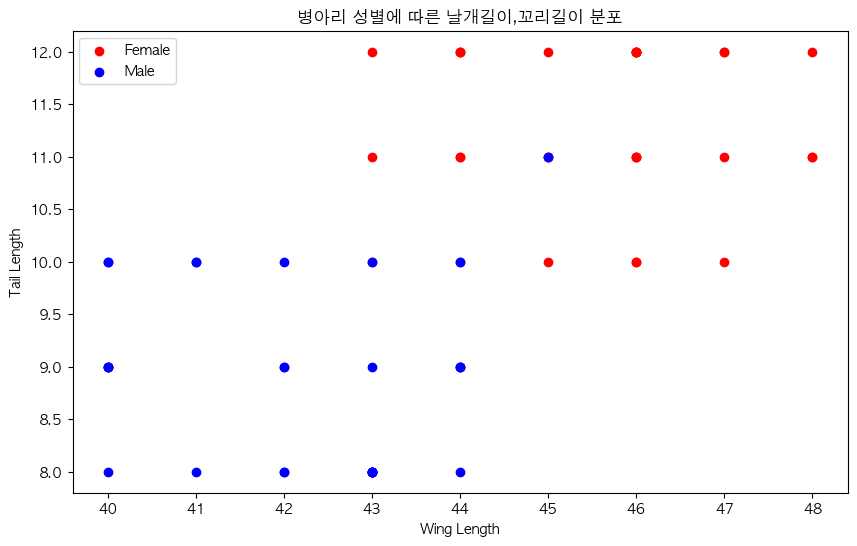

In [132]:
########################## 날개길이과 꼬리길이에 따른 성별 분포 1 
plt.figure(figsize=(10, 6))
############## female 암컷 분류 
wing_f = g[g['gender'] == 1]['wing_length']
tail_f = g[g['gender'] == 1]['tail_length']
############## male 수컷 분류 
wing_m = g[g['gender'] == 0]['wing_length']
tail_m = g[g['gender'] == 0]['tail_length']
############################ 그래프
plt.scatter(wing_f, tail_f , c='red', label='Female')
plt.scatter(wing_m, tail_m , c='blue', label='Male')
plt.xlabel('Wing Length')
plt.ylabel('Tail Length')
plt.legend()
plt.title('병아리 성별에 따른 날개길이,꼬리길이 분포')
plt.show()

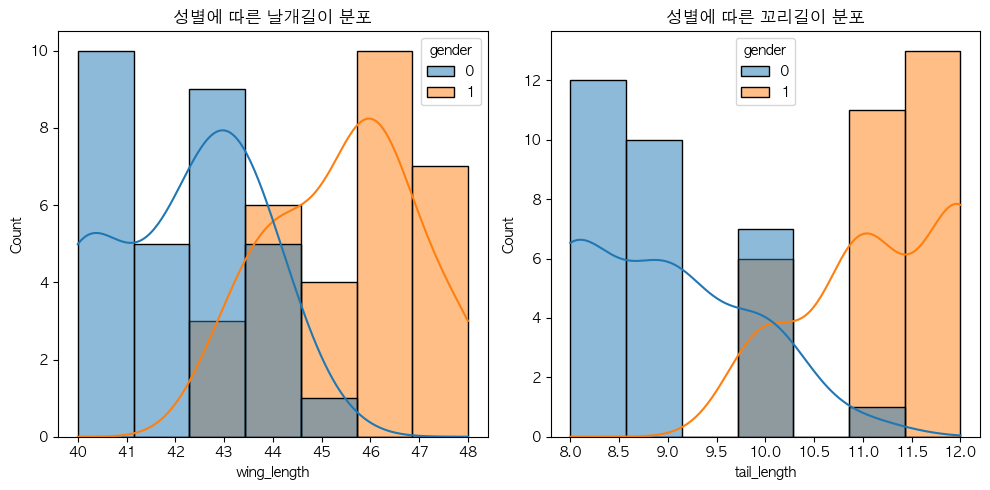

In [133]:
########################## 날개길이과 꼬리길이에 따른 성별 분포 2 
plt.figure(figsize=(10, 5))
############## 날개길이에 따른 성별 분포 
plt.subplot(1, 2, 1)
sns.histplot(data=g, x='wing_length', hue='gender', kde=True)
plt.title('성별에 따른 날개길이 분포')
############## 꼬리길이에 따른 성별 분포 
plt.subplot(1, 2, 2)
sns.histplot(data=g, x='tail_length', hue='gender', kde=True)
plt.title('성별에 따른 꼬리길이 분포')
############################ 시각화
plt.tight_layout()
plt.show()

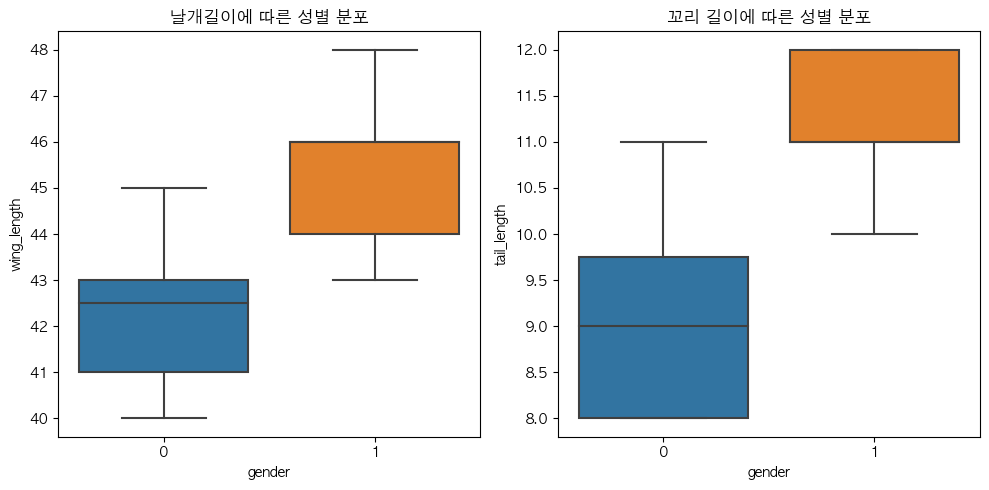

In [134]:
########################## 날개길이과 꼬리길이에 따른 성별 분포 3
plt.figure(figsize=(10, 5))
############## 날개 길이에 따른 성별 분포 
plt.subplot(1, 2, 1)
sns.boxplot(data=g, x='gender', y='wing_length')
plt.title('날개길이에 따른 성별 분포')
############## 꼬리 길이에 따른 성별 분포 
plt.subplot(1, 2, 2)
sns.boxplot(data=g, x='gender', y='tail_length')
plt.title('꼬리 길이에 따른 성별 분포')
########################## 시각화 
plt.tight_layout()
plt.show()

In [135]:
########################## 로지스틱 회귀 분석 
# 모듈 = statsmodels 패키지의 Logit.from_formula()
# 안에 들어갈 수식 = ( y ~ x1 + x2 ... , data = )
##########################
import statsmodels.api as sm 
########################## 모델 구축 및 학습
model_glm = sm.Logit.from_formula(
    'gender~ wing_length + tail_length', data=g
).fit()

Optimization terminated successfully.
         Current function value: 0.137215
         Iterations 9


In [136]:
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 gender   No. Observations:                   60
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            2
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                  0.8020
Time:                        19:59:19   Log-Likelihood:                -8.2329
converged:                       True   LL-Null:                       -41.589
Covariance Type:            nonrobust   LLR p-value:                 3.264e-15
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -70.1955     23.410     -2.999      0.003    -116.078     -24.313
wing_length     1.0531      0.505      2.087      0.037       0.064       2.042
tail_length     2.3859      0.969      2.462      0.014       0.486       4.285
===============================================================================
"""

![](https://velog.velcdn.com/images/beckhye/post/8b776ed6-f0eb-49a5-9efd-449eadf44250/image.png)

로지스틱 회귀 분석처럼 분류 알고리즘의 성능은 어떻게 평가할까요? <br>
1. **정오분류표 (Confusion Matrix)**<br>
   실제값과 예측값이 서로 얼마나 잘 떨어졌는지 표로 나타낸 것 입니다. <br>
   범주형 데이터의 경우 두 값이 같은지 다른지 True,False로 나타낼수 있어서 사용합니다.
   - 2행2열의 분류표 (실제값 예측값에 대한 각 Positive, Naegative)=TN,FN,FP,TP
   - 정확도, 민감도(재현율), 특이도 <br><br>
   
2. **ROC 커브** (Receiver Operation Characteristic Curve)<br>의 **밑부분 넓이인 AUC**(Area Under the ROC Curve)<br>
ROC커브는 정오분류표를 통해 도출해낼수 있는 민감도(재현율)을 y축으로, 1-특이도 를 x축으로 하는 커브입니다. <br>
이 커브의 밑부분 면적을 AUC라고 하는데, 100%에 가까울 수록, 분류 모델 성능이 뛰어나다고 볼 수 있습니다. 

In [137]:
g.head()

,wing_length,tail_length,gender
0,44,9,0
1,42,9,0
2,43,8,0
3,40,10,0
4,44,8,0


In [138]:
########################## 로지스틱 회귀모델 성능평가 
# predict() 메소드를 이용해서 예측값(확률) 생성

y_prob = model_glm.predict(g.iloc[:,0:2]) # gender컬럼만 빼고

# iloc[:,0:2] 란 , 
# g에서 모든 행(:)과 0번부터 1번 열까지(2번 열은 포함되지 않음)

y_prob

0     0.084421
1     0.011096
2     0.002951
3     0.014623
4     0.008412
5     0.002951
6     0.001031
7     0.002951
8     0.040806
9     0.002951
10    0.000360
11    0.040806
12    0.002951
13    0.001364
14    0.001364
15    0.001031
16    0.259040
17    0.002951
18    0.084421
19    0.500546
20    0.001364
21    0.084421
22    0.001364
23    0.108698
24    0.031162
25    0.014623
26    0.000126
27    0.011096
28    0.002951
29    0.968969
30    0.741797
31    0.998642
32    0.991624
33    0.891724
34    0.500546
35    0.998973
36    0.891724
37    0.988952
38    0.968969
39    0.998973
40    0.999642
41    0.959364
42    0.988952
43    0.915916
44    0.999642
45    0.991624
46    0.998642
47    0.998973
48    0.997062
49    0.996118
50    0.991624
51    0.998973
52    0.791660
53    0.976360
54    0.999875
55    0.259040
56    0.988952
57    0.915916
58    0.968969
59    0.998973
dtype: float64

In [139]:
y_prob.shape

(60,)

일반 회귀분석과 달리, 종속변수(y)가 확률값으로 나왔습니다. <br>
1에 가까울 수록 병아리의 성별이 female 암컷이라고 판정해도 될 것 같습니다.<br><br>
그렇다면, 암컷으로 판정할 수 있는 최소 확률값은 얼마일까요? <br>
0에 가까우면 수컷, 1에 가까우면 암컷이기에 50% 전후로 반올림하면 0 또는 1로 구분지을 수 있습니다.

In [140]:
############ 예측값(확률)을 반올림해서 0,1로 표현한뒤 list화
y_pred = list(map(round, y_prob))

# map()함수는 데이터셋을 '지정된 함수로 처리'해주는 함수입니다. 
# map( 함수, 데이터셋  )

############ 예측값 확인 
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1]

In [141]:
# 상위 5개만 
y_pred[0:5]

[0, 0, 0, 0, 0]

In [145]:
# list 형식이라서 .head()가 되지 않습니다. 
y_pred.head()

AttributeError: 'list' object has no attribute 'head'

In [146]:
############ 기준값인 gender열을 별도 y로 저장 
y = g['gender']

In [147]:
######################## 정오분류표 
from sklearn.metrics import confusion_matrix 

############ 분류 평가 0,1 순으로 출력
confusion_matrix(y, y_pred , labels = [0,1])

array([[28,  2],
       [ 1, 29]])

confusion_matrix( 실제값, 예측값, labels = 파라미터로 어떤걸 기준으로 설정할지 )<br>
labels 를 설정하지 않는 경우 0을 기준으로 진행된다. 

|정오|분류표|
|--|--|
|TP|FP|
|FN|TN|

**정확도는** (TP+TN) / (TP + TN + FP + FN) 으로 계산되며, <br>
**TP와 TN이 클수록 정확도가 높아지는 경향**이 있습니다. 
|정오|분류표|
|--|--|
|28|2|
|1|29|
<br>

민감도,재현율(Sensitivity, Recall)와 정밀도(Precision)의 경우 <br>
**classification_report(실제값,예측값) 함수로 확인** 가능합니다. 

In [148]:
######################## 분류 리포트 
from sklearn.metrics import classification_report

print(classification_report( y , y_pred ))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.94      0.97      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



- 정확도(accuracy) : 95% 
- 정밀도(Precision) : 0을 기준으로 97% 
- 민감도(Recall) : 0을 기준으로 93% 
- f1-score : 정밀도와 재현율을 결합한 지표로서, 높을 수록 어느 한쪽에 치우치지 않는다.<br><br>
**꽤 높은 성능으로 병아리의 암수 구분이 된 것으로 보여진다.**

In [149]:
######################## ROC커브 그리기 
# 모듈 불러오기 
from sklearn.metrics import roc_curve

# ROC 커브를 그리기 위한 변수 설정
fpr,tpr, thresholds = roc_curve(y,y_prob)

**ROC곡선은 FPR이 변할때, TPR이 어떻게 변하는지를 나타내는 곡선**입니다.<br>
FPR (False Positive Rate)가 x축 <br>
TPR (True Positive Rate)가 y축 <br> 

TPR : 재현율 = 민감도 <br> 
실제값 Positive가 정확히 예측해야하는 수준 <br>
예를 들면 질병이 있는 사람은 질병이 있는 것으로 양성 판정 <br><br>
TNR : 특이성 = 민감도에 대응하는 지표 (True Negative Rate) <br> 
TNR 에는 특이성 (Specificity)가 있습니다.<br>
실제값 Negative가 정확히 예측해야하는 수준 <br>
예를 들면 질병이 없는 사람은 질병이 없는 것으로 음성 판정 <br><br>

TNR 특이성 구하는 지표 = TN / (FP + TN) <br><br>
FPR <br>
= FP / (FP + TN) <br>
= 1 - TNR <br>
= 1 - 특이성 <br>
왜냐하면 threshold가 1이다. (곡선의 왼쪽아래모서리가 1, 오른쪽상단모서리가 0)

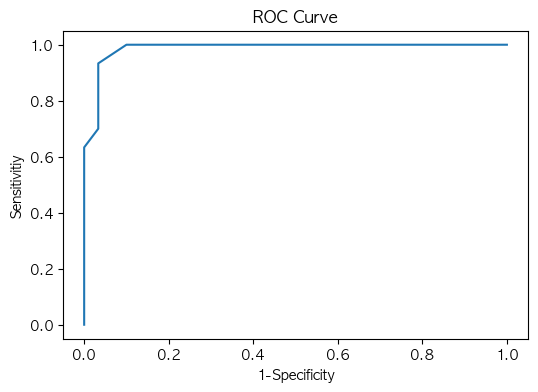

In [150]:
# ROC 커브 그리기 
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivitiy')
plt.show()

다소 꽉 찬 형태로 모델의 성능이 매우 뛰어난 것으로 보여집니다. 

In [151]:
######################## AUC 계산 
from sklearn.metrics import auc 

# AUC 계산 

auc(fpr, tpr)

0.9866666666666667

ROC 커브의 아래 면적인 AUC 값이 0.986으로 1에 가까운 매우 높은값으로 나왔습니다.<br>
병아리 암수 구분 로지스틱 회귀모델의 성능은 매우 뛰어나다고 평가할 수 있습니다. 

# 7. 병아리의 품종을 구분할 수 있을까요? (분류)

### 7-1) 분류 알고리즘 : 나이브 베이즈 
B라는 사건에 A사건이 어떤 영향을 미치는지 찾아내는 분류 기법입니다. <br>
지도학습이기 때문에 train용, test용을 8:2 또는 7:3으로 보통 분할합니다. <br>
8:2로 분할된 두 개의 데이터셋을 불러와서 진행하겠습니다. 

In [154]:
########################## 데이터 불러오기 
df_train = pd.read_csv('./data/ch6-2_train.csv')
df_test = pd.read_csv('./data/ch6-2_test.csv')
########################## 300마리 병아리데이터로 train용,test용 (8:2) 
print(df_train.shape)
print(df_test.shape)
########################## 날개길이, 꽁지길이, 볏 높이로 품종을 분류하는 훈련

(240, 4)
(60, 4)


In [159]:
df_train.head()

,wing_length,tail_length,comb_height,breeds
0,238,63,34,a
1,236,67,30,a
2,256,65,34,a
3,240,63,35,a
4,246,65,30,a


In [158]:
df_test.head()

,wing_length,tail_length,comb_height,breeds
0,258,67,32,a
1,260,64,34,a
2,251,63,31,a
3,248,63,30,a
4,254,62,32,a


In [155]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  240 non-null    int64 
 1   tail_length  240 non-null    int64 
 2   comb_height  240 non-null    int64 
 3   breeds       240 non-null    object
dtypes: int64(3), object(1)
memory usage: 7.6+ KB


In [156]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   comb_height  60 non-null     int64 
 3   breeds       60 non-null     object
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [163]:
print(df_train['breeds'].unique())
print(df_test['breeds'].unique())

['a' 'b' 'c']
['a' 'b' 'c']


In [164]:
df_train['breeds'].value_counts()

breeds
a    80
b    80
c    80
Name: count, dtype: int64

In [165]:
df_test['breeds'].value_counts()

breeds
a    20
b    20
c    20
Name: count, dtype: int64

In [172]:
########################## train, test 에서 각각 x용, y용 분할

x_train = df_train.iloc[:,0:3].values    # breeds컬럼만 빼고 모두 (features)
y_train = df_train.iloc[:,3].values      # breeds컬럼만 (target label)

x_test = df_test.iloc[:,0:3].values
y_test = df_test.iloc[:,3].values

########################## 나이브 베이즈 분류 알고리즘 학습시키기 위해서 sklearn을 사용 = ndarray타입 

In [176]:
x_test

array([[258,  67,  32],
       [260,  64,  34],
       [251,  63,  31],
       [248,  63,  30],
       [254,  62,  32],
       [230,  64,  33],
       [248,  65,  35],
       [250,  65,  33],
       [235,  62,  35],
       [241,  67,  30],
       [242,  64,  32],
       [246,  63,  32],
       [250,  64,  30],
       [259,  67,  33],
       [257,  65,  32],
       [232,  66,  34],
       [250,  67,  34],
       [236,  65,  34],
       [238,  62,  33],
       [249,  65,  33],
       [225,  68,  34],
       [213,  67,  35],
       [213,  68,  35],
       [223,  69,  35],
       [217,  69,  36],
       [231,  68,  38],
       [223,  69,  33],
       [214,  68,  38],
       [238,  71,  34],
       [229,  71,  37],
       [219,  69,  35],
       [237,  69,  37],
       [221,  70,  34],
       [230,  71,  35],
       [214,  71,  34],
       [228,  67,  38],
       [211,  66,  33],
       [217,  68,  33],
       [239,  66,  38],
       [239,  67,  33],
       [258,  74,  35],
       [252,  69

In [173]:
y_test          # NumPy 배열로 데이터를 추출되었다. 

array(['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c'], dtype=object)

In [174]:
# 나이브 베이즈 알고리즘 

from sklearn.naive_bayes import GaussianNB

In [175]:
# 모델 구축 및 학습 

model_nb = GaussianNB().fit(x_train, y_train)

In [178]:
# 예측값 생성 

y_pred_nb = model_nb.predict(x_test)

In [179]:
# 예측값 확인 

y_pred_nb

array(['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'c', 'b', 'b', 'b', 'b', 'c', 'b', 'b', 'b', 'b', 'b',
       'a', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'b',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c'], dtype='<U1')

예측값이 'a','b','c' 세 종류로 나왔습니다. 

In [180]:
# 테스트용 데이터(실제값 y_test)와 예측값(y_pred_nb)가 잘 맞는지 확인 

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_nb)

array([[20,  0,  0],
       [ 1, 17,  2],
       [ 0,  1, 19]])

총 60개 테스트용 데이터중에서 56개를 맞게 분류하였습니다.<br>
20 + 17 + 19 = 56 <br> <br> 
정확도 Accuracy 는 약 93.33% 입니다. <br><br>
정밀도(precision)과 민감도(Sensitivity,Recall)은 classification_report()함수를 이용해서 리포트 형태로 출력시키겠습니다. 

In [200]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.85      0.89        20
           c       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



정밀도와 민감도는 최소 0.85 이상으로 높은 편입니다.  

### 7-2) 분류 알고리즘 : KNN
k-최근접 이웃 (KNN , K-Nearest Neighbor)은 k값에 따라 새로운 데이터에 대한 분류 결과가 달라집니다. <br>
종속변수의 형태 (범주형 또는 연속형)에 따라 분류와 회귀 알고리즘에 모두 사용할 수 있습니다. 

In [203]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 구축 (k=3) 및 학습
model_knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

# 예측값 생성 
y_pred_knn = model_knn.predict(x_test)

# 예측 결과 평가  (실제값, 예측값) 
print(confusion_matrix(y_test, y_pred_knn))

# 정밀도 Precision, 민감도 Recall 확인 
print(classification_report(y_test,y_pred_knn))

[[19  1  0]
 [ 1 18  1]
 [ 0  1 19]]
              precision    recall  f1-score   support

           a       0.95      0.95      0.95        20
           b       0.90      0.90      0.90        20
           c       0.95      0.95      0.95        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



정확도Accuracy가 93% 나왔습니다. 

In [204]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 구축 (k=4) 및 학습
model_knn = KNeighborsClassifier(n_neighbors=4).fit(x_train, y_train)

# 예측값 생성 
y_pred_knn = model_knn.predict(x_test)

# 예측 결과 평가  (실제값, 예측값) 
print(confusion_matrix(y_test, y_pred_knn))

# 정밀도 Precision, 민감도 Recall 확인 
print(classification_report(y_test,y_pred_knn))

[[20  0  0]
 [ 1 18  1]
 [ 0  1 19]]
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.95      0.90      0.92        20
           c       0.95      0.95      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



정확도Accuracy가 95% 나왔습니다. 

In [205]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 구축 (k=5) 및 학습
model_knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)

# 예측값 생성 
y_pred_knn = model_knn.predict(x_test)

# 예측 결과 평가  (실제값, 예측값) 
print(confusion_matrix(y_test, y_pred_knn))

# 정밀도 Precision, 민감도 Recall 확인 
print(classification_report(y_test,y_pred_knn))

[[20  0  0]
 [ 1 17  2]
 [ 0  2 18]]
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.89      0.85      0.87        20
           c       0.90      0.90      0.90        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



정확도Accuracy가 92% 나왔습니다. <br><br>
해당 데이터 셋의 경우 k=4 성능이 조금 더 낫다고 평가 할 수 있습니다. <br>
**K-NN은 거리기반 알고리즘이기 때문에, 독립변수를 스케일링 한 후 학습시킴이 바람직합니다.**

### 7-3) 분류 알고리즘 : 의사결정나무 Decision Tree
의사결정나무는 종속변수가 범주형인 경우 분류나무 (Classification Tree), 연속형인경우 회귀나무 (Regression Tree)로 구분됩니다.

In [219]:
# 모듈 및 시각화 불러오기
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 모델 구축 및 학습
model_tree = DecisionTreeClassifier().fit(x_train, y_train)

# 예측값 생성 
y_pred_tree = model_tree.predict(x_test)

# 예측 결과 평가  (실제값, 예측값) 
print(confusion_matrix(y_test, y_pred_tree))

# 정밀도 Precision, 민감도 Recall 확인 
print(classification_report(y_test,y_pred_tree))

[[20  0  0]
 [ 1 18  1]
 [ 0  4 16]]
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.82      0.90      0.86        20
           c       0.94      0.80      0.86        20

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



정확도 Accuracy 가 0.90이다. Knn은 0.95 나온데에 비교하면 예측 성능이 낮은 편이다. <br>
DecisionTreeClassifier()함수의 기본 분할 기준(criterion)은 지니 지수이며 <br>
엔트로피 지수로 바꿔서 다시한번 모델을 만든 뒤 평가를 해보겠습니다. <br><br>
**의사결정나무의 의사결정규칙(가지를 분할할 때) 만드는 기준이 되는 독립변수 항목과 값을 선택 하는 방법에는 여러가지가 있다.**
1. 지니지수 (Gini Index)
2. x^2 통계량의 p값
3. 엔트로피 지수 (Entropy Index)

In [220]:
################################ 기본 분할 기준 criterion : 지니지수 ----> 엔트로피 지수 

# 모델 구축 및 학습
model_tree2 = DecisionTreeClassifier(criterion = 'entropy').fit(x_train, y_train)

# 예측값 생성 
y_pred_tree2 = model_tree2.predict(x_test)

# 예측 결과 평가  (실제값, 예측값) 
print(confusion_matrix(y_test, y_pred_tree2))

# 정밀도 Precision, 민감도 Recall 확인 
print(classification_report(y_test,y_pred_tree2))

[[20  0  0]
 [ 1 18  1]
 [ 0  2 18]]
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



정확도 Accuracy 가 0.93이다. 0.03 성능이 올랐습니다. <br>
해당 데이터셋의 경우, 분할 기준으로 지니 지수보다는 엔트로피 지수가 더 적합합니다. <br>
이제, 모델이 어떻게 분류되었는지 트리로 그려보겠습니다. 

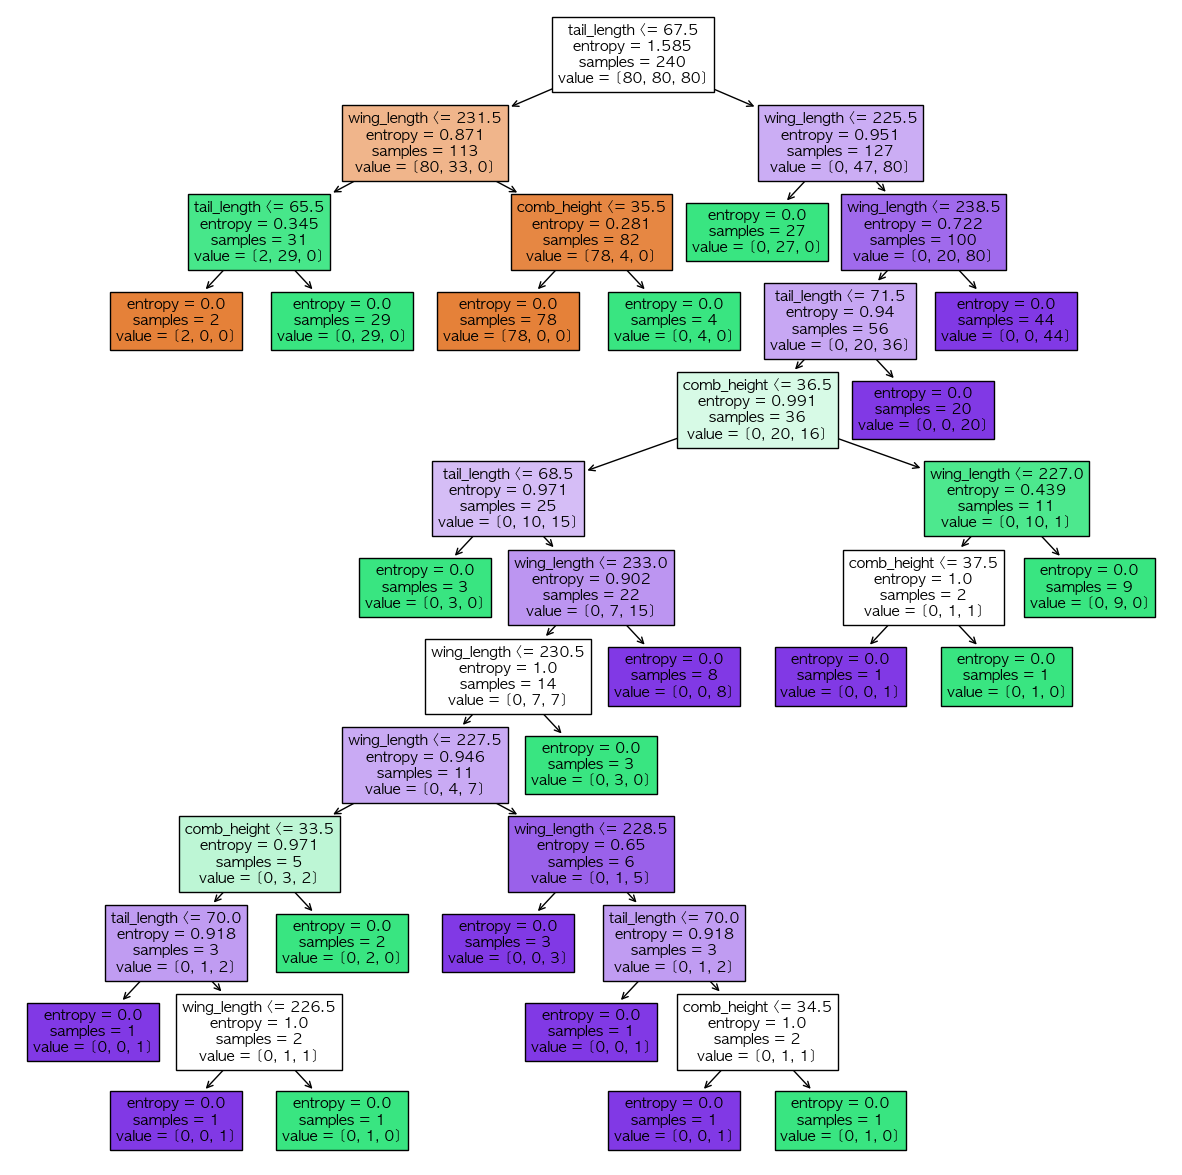

In [221]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plot_tree(model_tree2, feature_names = ['wing_length','tail_length','comb_height'],filled = True)
plt.show()

다소 복잡한 트리 구조가 생성되었습니다. <br>
트리 구조가 복잡해진 데에는, 학습 데이터에 과적합 되었을 확률이 높습니다. <br>
복잡한 구조는 일반화하기 어렵기 때문에 단순화할 필요가 있습니다. <br><br>
분할 기준으로 엔트로피 지수 이용 + 트리의 깊이를 3을 제한하여 진행해보겠습니다. 

In [222]:
################################ 기본 분할 기준 criterion : 지니지수 ----> 엔트로피 지수 
################################ 트리의 깊이 3으로 제한 

# 모델 구축 및 학습
model_tree3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3).fit(x_train, y_train)

# 예측값 생성 
y_pred_tree3 = model_tree3.predict(x_test)

# 예측 결과 평가  (실제값, 예측값) 
print(confusion_matrix(y_test, y_pred_tree3))

# 정밀도 Precision, 민감도 Recall 확인 
print(classification_report(y_test,y_pred_tree3))

[[20  0  0]
 [ 1 14  5]
 [ 0  2 18]]
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.88      0.70      0.78        20
           c       0.78      0.90      0.84        20

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.86        60
weighted avg       0.87      0.87      0.86        60



정확도 Accuracy 가 0.93이였는데 현재는 오히려 0.87로 떨어졌습니다. <br>
하지만 0.87의 수치는 그렇게 낮은 값이 아닙니다. 

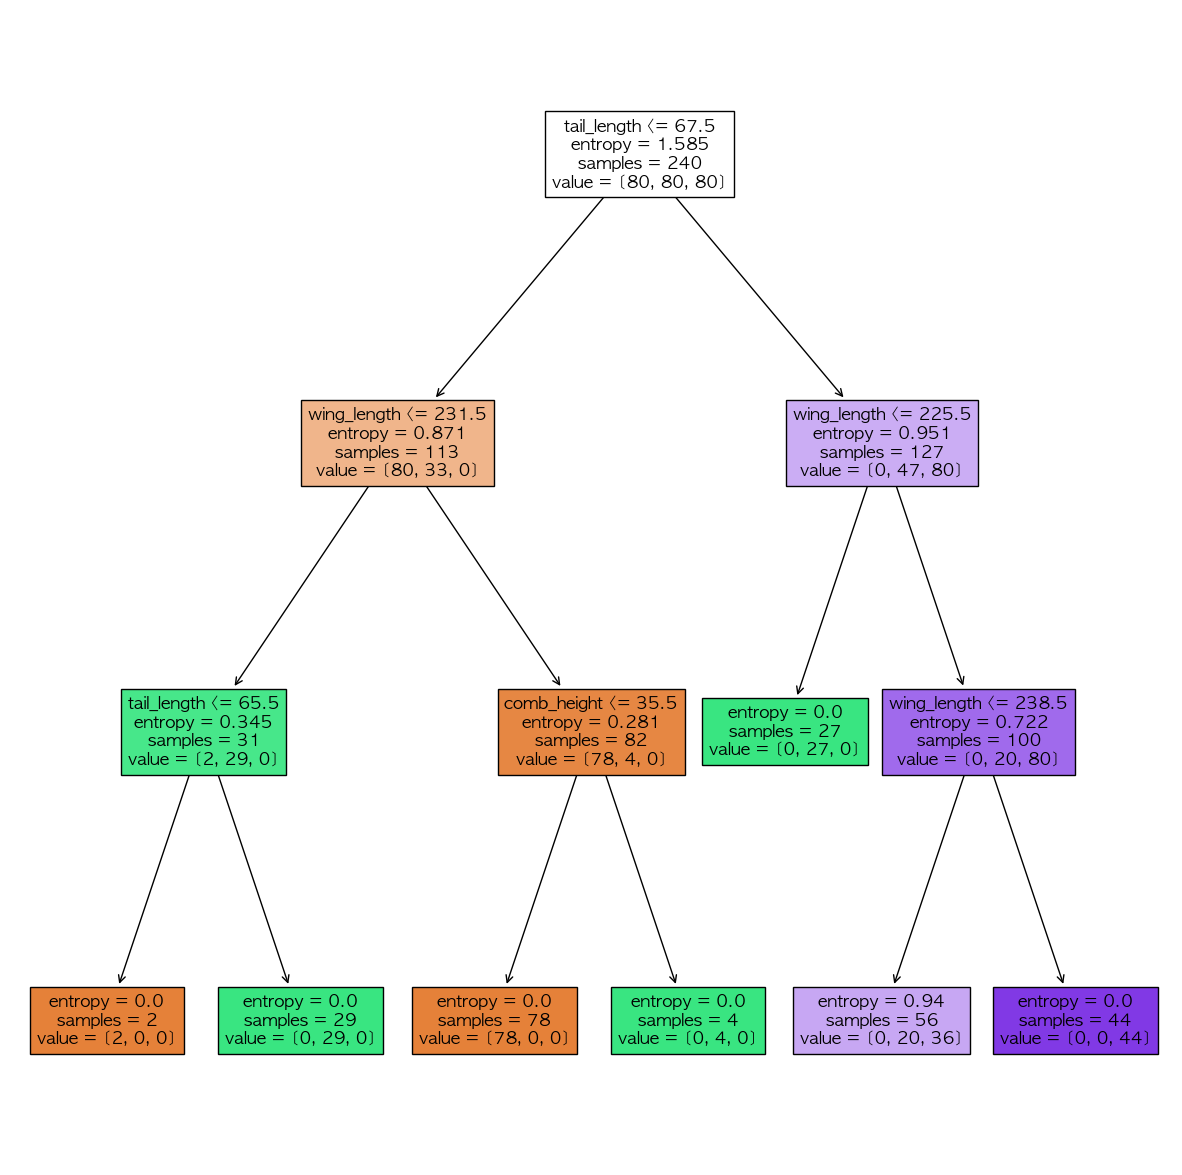

In [223]:
plt.figure(figsize=(15,15))
plot_tree(model_tree3, feature_names = ['wing_length','tail_length','comb_height'],filled = True)
plt.show()

트리의 크기(깊이)를 3으로 제한하여 보다 단순해졌습니다. <br>
이렇게 트리의 크기(깊이)를 제한하여 과적합을 방지하는 방법을 가지치기 pruning이라고 합니다. 

# 8. 병아리의 품종을 구분할 수 있을까요? (앙상블) 

앙상블 Ensemble은 여러 개의 예측 모델을 만든 뒤, 조합해 하나의 최적화된 최종 예측 모델을 만듭니다. <br>
분류와 회귀 모두에 사용될 수 있습니다.

앙상블 --> 배깅--> (의사결정나무 + ) 랜덤 포레스트  <br>
앙상블 --> 부스팅 --> AdaBoost 또는 GBM ----> GBM ----> XGBoost 또는 Light GBM 

### 8.1 배깅 Bagging 

Bootstrap Aggregating의 줄임말로, 학습 데이터셋으로부터 동일 크기의 표본을 '단순 랜덤 복원'추출하여 여러 개를 만들고 <br>
각 표본에 대한 예측 모델을 생성한 뒤 결합하여 최종 예측 모델을 만드는 알고리즘입니다. <br><br>
여기서 학습 데이터 셋에서 '단순 랜덤 복원'추출하여 동일 크기의 표본을 여러 개 만드는 샘플링 방법을 '부트스트랩(Bootstrap)'이라고 합니다.<br>
부트스트랩시 각 표본에 동일한 확률을 부여합니다. 

In [227]:
# 모듈 불러오기 
from sklearn.ensemble import BaggingClassifier

# 모델 구축 및 학습
model_bag = BaggingClassifier().fit(x_train, y_train)

# 예측값 생성 
y_pred_bag = model_bag.predict(x_test)

# 예측 결과 평가  (실제값, 예측값) 
print(confusion_matrix(y_test,y_pred_bag))

# 정밀도 Precision, 민감도 Recall 확인 
print(classification_report(y_test,y_pred_bag))

[[20  0  0]
 [ 1 18  1]
 [ 0  1 19]]
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.95      0.90      0.92        20
           c       0.95      0.95      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



정확도 Accuracy 가 0.95 입니다. 

### 8.2 부스팅 Boosting 

이미 설명한 것처럼, 학습 데이터 셋에서 '단순 랜덤 복원'추출하여 동일 크기의 표본을 여러 개 만드는 샘플링 방법을 '부트스트랩(Bootstrap)'이라고 합니다.<br>
배깅 Bagging 은 부트스트랩시 각 표본에 동일한 확률을 부여합니다. <br>
부스팅 Boosting은 잘못 분류된 표본에 더 큰 가중치를 적용하여, 새로운 분류 규칙을 만들고 이러한 과정을 반복하여 최종 모형을 만드는 알고리즘입니다. <br><br>

부스팅에는 AdaBoost, GBM 이 있고, 배깅보다 성능이 뛰어난 경우가 많습니다. <br>
GBM중에서 XGBoost의 경우 성능이 뛰어나 캐글 Kaggle에서 상위 랭커들이 사용해 높은 인기를 얻은 알고리즘입니다. 